In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

### Computation of the integral

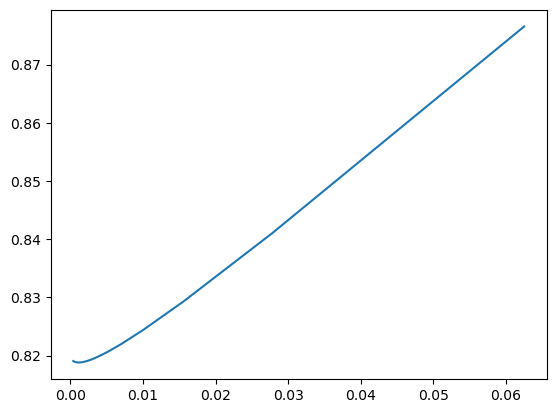

In [8]:
def integrant(x):
    return .2 + 25 * x - 200 * x **2 +675 * x ** 3-900 * x ** 4+400 * x ** 5


exact = 0.2 * 0.8 + (25 /2) * 0.8 ** 2 - (200/3) * 0.8 ** 3 + (675/4) * 0.8 ** 4 - (900/5) * 0.8 ** 5 + (400/6) * 0.8 **6
def trapezoidal(N):
    delta = 0.8/N
    x=0.
    approx = 0.
    approx+=(integrant(0.) + integrant(0.8))
    for i in range(1, N):
        x+=delta
        approx += integrant(x)
    approx*=delta/2
    return abs(approx - exact)

list_of_intervals = [1/(n ** 2) for n in range(3, 51)]
errors = []
for i in range(3, 51):
    errors.append(trapezoidal(i))
plt.plot(list_of_intervals, errors)

### Repetition of the above exercise using simpson 1/3 rule 

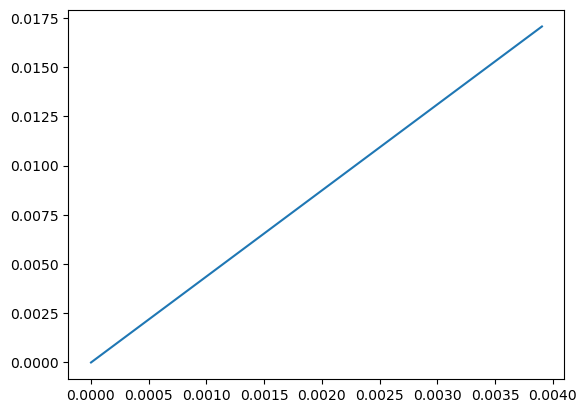

In [7]:
def sympson(N):
    delta = 0.8/N
    x=0.
    x1=0.
    x2=0.
    approx = 0.
    approx+=(integrant(0.) + integrant(0.8))
    for i in range(1, N):
        if i%2 == 1:
            x1 += integrant(x + i * delta)
        elif i%2==0:               
            x2 += integrant(x + i * delta)
    approx+=(4 * x1 + 2 * x2)
    approx*=delta/3
    return abs(approx - exact)

list_of_intervals = [1/(n ** 4) for n in np.arange(4, 51, 2)]
errors = []
for i in np.arange(4, 51, 2):
    errors.append(sympson(i))
plt.plot(list_of_intervals, errors)

### 

### Reptition of 1, 2 using scipy.integrate module

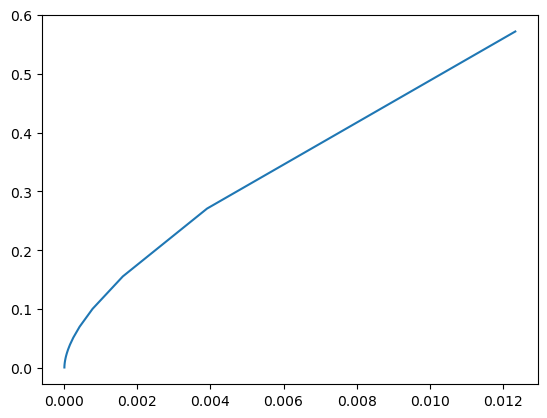

In [6]:
from scipy import integrate
errors = []
list_of_intervals = [1/(n ** 4) for n in range(3, 51)]
for i in range(3, 51):
    x = np.linspace(0., .8, num=i)
    errors.append(abs(integrate.trapezoid(integrant(x), x)-exact))
plt.plot(list_of_intervals, errors)

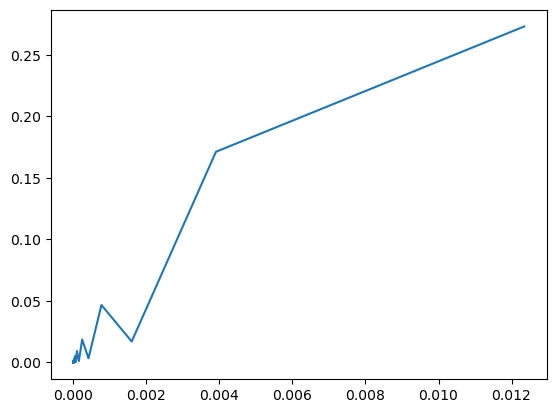

In [7]:
errors = []
for i in range(3, 51):
    x = np.linspace(0., .8, num=i)
    errors.append(abs(integrate.simpson(integrant(x), x)-exact))
plt.plot(list_of_intervals, errors)

### Computation of the elements of matrix A using Gauss-legendre qudrature rule

In [9]:
from scipy.special import eval_legendre
from numpy.polynomial.legendre import leggauss

In [15]:
A = np.zeros((10, 10))
points, weight = leggauss(10)
for k in range(10):
    for j in range(10):
        for p in range(10):
            A[k, j] += weight[p] * eval_legendre(k, points[p]) * eval_legendre(j, points[p])
            
print(A)

[[ 2.00000000e+00  5.55111512e-17 -4.64905892e-16 -6.93889390e-17
   1.38777878e-16 -1.73472348e-16  2.56739074e-16 -7.97972799e-17
   1.14491749e-16  1.99493200e-16]
 [ 5.55111512e-17  6.66666667e-01 -6.93889390e-18 -9.02056208e-17
  -1.38777878e-16  2.28983499e-16 -9.71445147e-17  1.59594560e-16
   5.89805982e-17 -8.67361738e-17]
 [-4.64905892e-16 -2.08166817e-17  4.00000000e-01 -1.04083409e-16
   0.00000000e+00 -6.93889390e-17  1.45716772e-16  3.46944695e-18
   1.04083409e-17  9.28077060e-17]
 [-6.93889390e-17 -1.24900090e-16 -1.04083409e-16  2.85714286e-01
  -5.55111512e-17  5.55111512e-17 -6.93889390e-18  2.08166817e-17
   2.77555756e-17  3.72965547e-17]
 [ 1.38777878e-16 -1.59594560e-16  6.93889390e-18 -4.85722573e-17
   2.22222222e-01  0.00000000e+00 -5.20417043e-17  6.93889390e-18
   4.68375339e-17  1.82145965e-17]
 [-1.73472348e-16  1.87350135e-16 -6.93889390e-17  4.85722573e-17
   0.00000000e+00  1.81818182e-01  1.04083409e-17 -1.73472348e-17
   2.08166817e-17  1.56125113e-17